In [53]:


#کتابخانه مورد نیاز
import numpy as np
import numpy.random as nr

In [4]:
#تعریف همسایه ها در هر حالت 
#u ---> بالا
#d ---> پایین
#l ---> چپ
#r ---> راست

neighbors = {0:{'u':8, 'd':0, 'l':0, 'r':1},
          1:{'u':9, 'd':1, 'l':0, 'r':2},
          2:{'u':10, 'd':2, 'l':1, 'r':3},
          3:{'u':11, 'd':3, 'l':2, 'r':4},
          4:{'u':4, 'd':4, 'l':3, 'r':5},
          5:{'u':13, 'd':5, 'l':4, 'r':6},
          6:{'u':14, 'd':6, 'l':5, 'r':7},
          7:{'u':15, 'd':7, 'l':6, 'r':7},


          8:{'u':16, 'd':0, 'l':8, 'r':9},
          9:{'u':17, 'd':1, 'l':8, 'r':10},
          10:{'u':18, 'd':2, 'l':9, 'r':11},
          11:{'u':19, 'd':3, 'l':10, 'r':11},
          12:{'u':12, 'd':12, 'l':12, 'r':12},###دیوار
          13:{'u':21, 'd':5, 'l':13, 'r':14},
          14:{'u':22, 'd':6, 'l':13, 'r':15},
          15:{'u':23, 'd':7, 'l':14, 'r':15},


          16:{'u':24, 'd':8, 'l':16, 'r':17},
          17:{'u':25, 'd':9, 'l':16, 'r':18},
          18:{'u':18, 'd':10, 'l':17, 'r':19},
          19:{'u':27, 'd':11, 'l':18, 'r':20},
          20:{'u':28, 'd':20, 'l':19, 'r':21},
          21:{'u':29, 'd':13, 'l':20, 'r':22},
          22:{'u':30, 'd':14, 'l':21, 'r':23},
          23:{'u':31, 'd':15, 'l':22, 'r':23},


          24:{'u':32, 'd':16, 'l':24, 'r':25},
          25:{'u':33, 'd':17, 'l':24, 'r':25},
          26:{'u':26, 'd':26, 'l':26, 'r':26},###دیوار
          27:{'u':35, 'd':19, 'l':27, 'r':28},
          28:{'u':36, 'd':20, 'l':27, 'r':29},
          29:{'u':37, 'd':21, 'l':28, 'r':30},
          30:{'u':38, 'd':22, 'l':29, 'r':31},
          31:{'u':39, 'd':23, 'l':30, 'r':31},


          32:{'u':40, 'd':24, 'l':32, 'r':33},
          33:{'u':41, 'd':25, 'l':32, 'r':33},
          34:{'u':34, 'd':34, 'l':34, 'r':34},###دیوار
          35:{'u':43, 'd':27, 'l':35, 'r':36},
          36:{'u':44, 'd':28, 'l':35, 'r':37},
          37:{'u':45, 'd':29, 'l':36, 'r':38},
          38:{'u':38, 'd':30, 'l':37, 'r':39},
          39:{'u':47, 'd':31, 'l':38, 'r':39},


          40:{'u':48, 'd':32, 'l':40, 'r':41},
          41:{'u':49, 'd':33, 'l':40, 'r':41},
          42:{'u':42, 'd':42, 'l':42, 'r':42},###دیوار
          43:{'u':51, 'd':35, 'l':43, 'r':44},
          44:{'u':52, 'd':36, 'l':43, 'r':45},
          45:{'u':53, 'd':37, 'l':44, 'r':45},
          46:{'u':46, 'd':46, 'l':46, 'r':46},###دیوار
          47:{'u':55, 'd':39, 'l':47, 'r':47},


          48:{'u':56, 'd':40, 'l':48, 'r':49},
          49:{'u':57, 'd':41, 'l':48, 'r':50},
          50:{'u':58, 'd':50, 'l':49, 'r':51},
          51:{'u':59, 'd':43, 'l':50, 'r':52},
          52:{'u':60, 'd':44, 'l':51, 'r':53},
          53:{'u':61, 'd':45, 'l':52, 'r':53},
          54:{'u':54, 'd':54, 'l':54, 'r':54},###دیوار
          55:{'u':63, 'd':47, 'l':55, 'r':55},


          56:{'u':56, 'd':48, 'l':56, 'r':57},
          57:{'u':57, 'd':49, 'l':56, 'r':58},
          58:{'u':58, 'd':50, 'l':57, 'r':59},
          59:{'u':59, 'd':51, 'l':58, 'r':60},          
          60:{'u':60, 'd':52, 'l':59, 'r':61},
          61:{'u':61, 'd':53, 'l':60, 'r':61},
          62:{'u':62, 'd':62, 'l':62, 'r':62},###دیوار
          63:{'u':63, 'd':63, 'l':63, 'r':63} #هدف
          }

In [5]:
#ایجاد سیاست تصادفی اولیه


policy  = {0:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          1:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          2:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          3:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          4:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          5:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          6:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          7:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          8:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          9:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          10:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          11:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          12:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          13:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          14:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          15:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          16:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          17:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          18:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          19:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          20:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          21:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          22:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          23:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          24:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          25:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          26:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          27:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          28:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          29:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          30:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          31:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          32:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          33:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          34:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          35:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          36:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          37:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          38:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          39:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          40:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          41:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          42:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          43:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          44:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          45:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          46:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          47:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          48:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          49:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          50:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          51:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          52:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          53:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          54:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          55:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},


          56:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          57:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          58:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          59:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},          
          60:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          61:{'u':0.25, 'd':0.25, 'l':0.25, 'r':0.25},
          62:{'u':0, 'd':0, 'l':0, 'r':0},###دیوار
          63:{'u':0, 'd':0, 'l':0, 'r':0} #هدف
          }

In [6]:
#تعریف پایداش برای هر اقدام با توجه به سوال

reward   = {0:{'u':0, 'd':0, 'l':0, 'r':0},
            1:{'u':0, 'd':0, 'l':0, 'r':0},
            2:{'u':0, 'd':0, 'l':0, 'r':0},
            3:{'u':0, 'd':0, 'l':0, 'r':0},
            4:{'u':0, 'd':0, 'l':0, 'r':0},
            5:{'u':0, 'd':0, 'l':0, 'r':0},
            6:{'u':0, 'd':0, 'l':0, 'r':0},
            7:{'u':0, 'd':0, 'l':0, 'r':0},


            8:{'u':0, 'd':0, 'l':0, 'r':0},
            9:{'u':0, 'd':0, 'l':0, 'r':0},
            10:{'u':0, 'd':0, 'l':0, 'r':0},
            11:{'u':0, 'd':0, 'l':0, 'r':0},
            12:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            13:{'u':0, 'd':0, 'l':0, 'r':0},
            14:{'u':0, 'd':0, 'l':0, 'r':0},
            15:{'u':0, 'd':0, 'l':0, 'r':0},


            16:{'u':0, 'd':0, 'l':0, 'r':0},
            17:{'u':0, 'd':0, 'l':0, 'r':0},
            18:{'u':0, 'd':0, 'l':0, 'r':0},
            19:{'u':0, 'd':0, 'l':0, 'r':0},
            20:{'u':0, 'd':0, 'l':0, 'r':0},
            21:{'u':0, 'd':0, 'l':0, 'r':0},
            22:{'u':0, 'd':0, 'l':0, 'r':0},
            23:{'u':0, 'd':0, 'l':0, 'r':0},


            24:{'u':0, 'd':0, 'l':0, 'r':0},
            25:{'u':0, 'd':0, 'l':0, 'r':0},
            26:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            27:{'u':0, 'd':0, 'l':0, 'r':0},
            28:{'u':0, 'd':0, 'l':0, 'r':0},
            29:{'u':0, 'd':0, 'l':0, 'r':0},
            30:{'u':0, 'd':0, 'l':0, 'r':0},
            31:{'u':0, 'd':0, 'l':0, 'r':0},


            32:{'u':0, 'd':0, 'l':0, 'r':0},
            33:{'u':0, 'd':0, 'l':0, 'r':0},
            34:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            35:{'u':0, 'd':0, 'l':0, 'r':0},
            36:{'u':0, 'd':0, 'l':0, 'r':0},
            37:{'u':0, 'd':0, 'l':0, 'r':0},
            38:{'u':0, 'd':0, 'l':0, 'r':0},
            39:{'u':0, 'd':0, 'l':0, 'r':0},


            40:{'u':0, 'd':0, 'l':0, 'r':0},
            41:{'u':0, 'd':0, 'l':0, 'r':0},
            42:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            43:{'u':0, 'd':0, 'l':0, 'r':0},
            44:{'u':0, 'd':0, 'l':0, 'r':0},
            45:{'u':0, 'd':0, 'l':0, 'r':0},
            46:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            47:{'u':0, 'd':0, 'l':0, 'r':0},


            48:{'u':0, 'd':0, 'l':0, 'r':0},
            49:{'u':0, 'd':0, 'l':0, 'r':0},
            50:{'u':0, 'd':0, 'l':0, 'r':0},
            51:{'u':0, 'd':0, 'l':0, 'r':0},
            52:{'u':0, 'd':0, 'l':0, 'r':0},
            53:{'u':0, 'd':0, 'l':0, 'r':0},
            54:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            55:{'u':100, 'd':0, 'l':0, 'r':0},


            56:{'u':0, 'd':0, 'l':0, 'r':0},
            57:{'u':0, 'd':0, 'l':0, 'r':0},
            58:{'u':0, 'd':0, 'l':0, 'r':0},
            59:{'u':0, 'd':0, 'l':0, 'r':0},
            60:{'u':0, 'd':0, 'l':0, 'r':0},
            61:{'u':0, 'd':0, 'l':0, 'r':0},
            62:{'u':0, 'd':0, 'l':0, 'r':0},#دیوار
            63:{'u':0, 'd':0, 'l':0, 'r':0} #هدف
}

In [54]:
#تعریف دیوار در محیط شبکه ای 

taboo = [12,26,34,42,46,54,62]

In [66]:
#در این تابع با گرفتن حالت و فعالیت میزان پاداش و حالت بعدی برگردانده میشود

def state_values(s, action, neighbors = neighbors, rewards = reward):

    s_prime = neighbors[s][action]
    reward = rewards[s][action]
    return (s_prime,reward)

In [67]:

import copy

#تابع انتخاب 
#در صورتی که حالت هدف نباشد به صورت رندوم یک عمل را انتخاب میکنیم  


def select_a_prime(s_prime, policy, action_index, greedy, goal):
    
    if(s_prime != goal and greedy): 
        probs = list(policy[s_prime].values())        
        a_prime_index = nr.choice(action_index, size = 1, p = probs)[0]
        a_prime = list(policy[s_prime].keys())[a_prime_index]
    else:
        a_prime_index = nr.choice(action_index, size = 1)[0]
        a_prime = list(policy[s_prime].keys())[a_prime_index]   
    return(a_prime_index, a_prime)

In [68]:
#تعریف تابع مقدار تصادفی اولیه

def initialize_values(neighbors):
    V =np.zeros([64])
    for state in range(64):
        V[state] = np.random.normal()
    return V

سوال اول

In [73]:
#محاسبه تابع پیشگویی تفاوت زمانی چندگامی

def TD_n(policy, episodes, n, goal, alpha, gamma , epsilon ):
    
    ##  انتخاب لیست حالت و مقادیر عمل را انتخاب میکنیم
    states = list(policy.keys())
    n_states = len(states)
    
    ## اقدامات احتمالی و مقادیر عمل را انتخاب میکنیم
    action_index = list(range(len(list(policy[0].keys()))))
    v = [0]*len(list(policy.keys()))    
    current_policy = copy.deepcopy(policy)
    s = nr.choice(states, size = 1)[0] ## حال در ابتدا یک حالت اولیه را به صورت تصادفی نمونه میگیریم و بررسی میکنیم که حالت پایانی یا دیوار نباشد
    while(s in taboo+[goal]):
        s = nr.choice(states, size = 1)[0]  
        
    for _ in range(episodes): # به ازای هر اپیزود
        T = float("inf")
        tau = 0
        reward_list = []
        t = 0
        
        while(tau != T - 1): # اپیزود به پایان می رسد که به هدف رفته باشیم
            if(t < T):
                
                probs = list(policy[s].values())  ## عمل را با توجه به سیاست خود انتخاب میکنیم
                a = list(policy[s].keys())[nr.choice(action_index, size = 1, p = probs)[0]]
                s_prime, reward = state_values(s, a)  ## حال حالت بعدی را با توجه به عمل داده شده انتخاب میکنیم
                reward_list.append(reward)  # پاداش ها را به لیست اضافه میکنیم
                if(s_prime == goal): T = t + 1  # به حالت هدف رسیدیم
                
            tau = t - n + 1 ## به روز رسانی میکنیم

            if(tau >= 0): # اگر زمان کافی برای محاسبه بازگشت داریم بازگشت را محاسبه میکنیم
                G = 0.0 
                for i in range(tau, min(tau + n - 1, T)):
                    G = G + gamma**(i-tau) * reward_list[i]                   
                if(tau + n < T): G = G + gamma**n * v[s_prime]  ## در مورد جایی که ما در حالت دیوار یا هدف نیستیم برخورد کنیم                
                v[s] = v[s] + alpha * (G - v[s])  ## مقدار تابع مقدار را اپدیت میکنیم
            
            ## حالت را برای تکرار بعدی تنظیم می کنیم
            if(s_prime != goal):
                s = s_prime
            t = t +1
    return(v)

In [12]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )

#فراخونی تابع 

V_1 = np.round(np.array(TD_n(policy, episodes = 100000, n = 1, goal = 63, alpha = 0.1, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

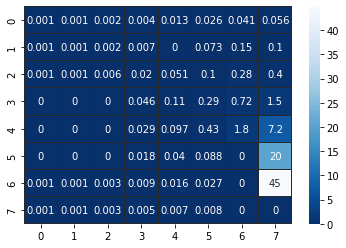

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_2,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

In [74]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_6 = np.round(np.array(TD_n(policy, episodes = 10, n = 6, goal = 63, alpha = 0.1, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

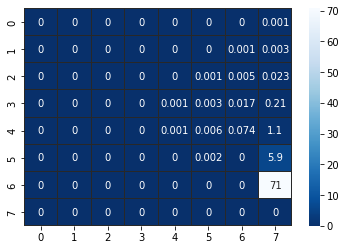

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_6,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

In [53]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_05 = np.round(np.array(TD_n(policy, episodes = 10000, n = 2, goal = 63, alpha = 0.5, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

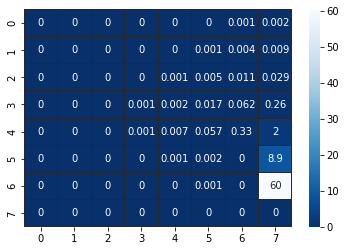

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_05,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

In [72]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 10000, n = 2, goal = 63, alpha = 0.6, gamma = 0.4, epsilon = 1)).reshape((8,8)), 8)

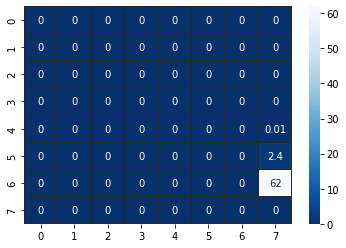

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

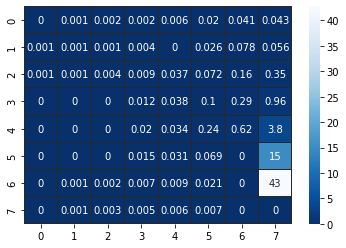

In [52]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.2, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

#V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.2, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

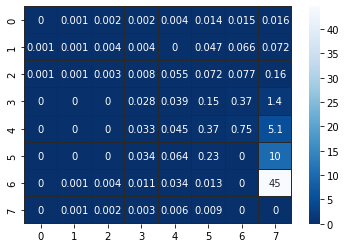

In [46]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.4, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

#V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.4, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

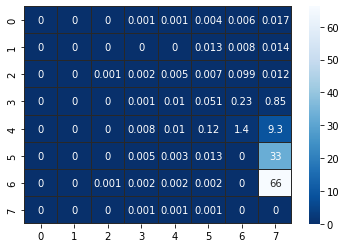

In [47]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.6, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

#V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.6, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

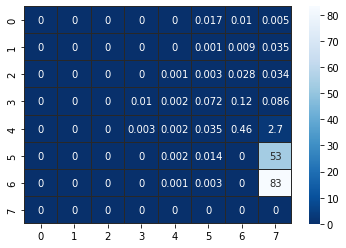

In [48]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.8, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.8, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

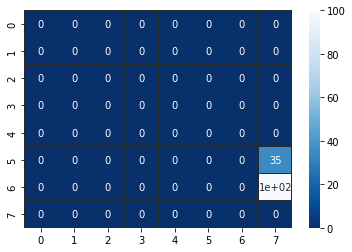

In [49]:
#TD_n(policy, episodes, n, goal, alpha, gamma , epsilon )
V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 1, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
j=np.round(V_45,3).reshape([8,8])
ax = seaborn.heatmap(j, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
plt.show()

#V_45 = np.round(np.array(TD_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 1, gamma = 0.9, epsilon = 1)).reshape((8,8)), 8)

سوال دوم

In [76]:
# الگوريتم سارسای چند گامی

def SARSA_n(policy, episodes, n, goal, alpha , gamma , epsilon):
    states = list(policy.keys())   ##  انتخاب لیست حالت و مقادیر عمل را انتخاب میکنیم
    n_states = len(states)
    action_index = list(range(len(list(policy[0].keys()))))      ## اقدامات احتمالی و مقادیر عمل را انتخاب میکنیم
    Q = np.zeros((len(action_index),len(states)))
    current_policy = copy.deepcopy(policy)
    for _ in range(episodes): # برای هر اپیزود یا واقعه
        s = nr.choice(states, size = 1)[0] ##یک حالت را به صورت تصادفی انتخاب میکنیم و بررسی میکنیم که حالت پایانی یا دیوار نباشد
        while(s in taboo+[goal]):
            s = nr.choice(states, size = 1)[0]
        a_index, a = select_a_prime(s, current_policy, action_index, True, goal) ##با توجه به سیاست یک عمل را انتخاب میکنیم
        t = 0   ## شروع time step
        T = float("inf")
        tau = 0
        reward_list = []
        while(tau != T - 1): # تا رسیدن به حالت پایانی ادامه میدهیم 
            if(t < T):
                s_prime, reward = state_values(s, a) ##محاسبه حالت بعدی و پاداش آن با توجه به مقدار عمل
                reward_list.append(reward)  # اضافه کردن پاداش به لیست خود
                if(s_prime == goal): T = t + 1  # اگر به حالت هدف رسیده باشیم
                else:
                    a_prime_index, a_prime = select_a_prime(s_prime, current_policy, action_index, True, goal) ##اقدام بعدی را با استفاده از سیاست انتخاب و ذخیره کنید
            tau = t - n + 1 ## به روزرسانی time step 
            if(tau >= 0): # اگر زمان کافی بود مقدار بازگشت را محاسبه میکنیم
                G = 0.0 
                for i in range(tau, min(tau + n, T)):
                    G = G + gamma**(i-tau) * reward_list[i]   
                if(tau + n < T): G = G + gamma**n * Q[a_prime_index,s_prime]
                Q[a_index,s] = Q[a_index,s] + alpha * (G - Q[a_index,s])  #مقدار qرا اپدیت میکنیم 
            if(s_prime != goal):   ##اقدام و حالت را برای تکرار بعدی تنظیم کنید
                s = s_prime   
                a = a_prime 
                a_index = a_prime_index
                
            t = t + 1
    return(Q)

In [ ]:
#def SARSA_n(policy, episodes, n, goal, alpha = 0.2, gamma = 0.9, epsilon = 0.1):

In [ ]:
#policy

In [77]:
Q = SARSA_n(policy, episodes = 100, n = 1, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)

In [78]:

f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t


In [79]:
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' 'v' '>' 'v' 'v' 'v']
 ['>' '>' 'v' 'v' '-' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' 'v' 'v']
 ['^' '^' '-' '>' '>' 'v' '>' 'v']
 ['^' '^' '-' '>' '>' '>' '>' 'v']
 ['v' 'v' '-' '>' '>' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']]


In [28]:
Q = SARSA_n(policy, episodes = 1000, n = 2, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)

In [29]:

f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' '>' '>' 'v' 'v' 'v']
 ['>' '>' 'v' 'v' '-' '>' 'v' 'v']
 ['>' '>' '>' '>' '>' 'v' 'v' 'v']
 ['>' '^' '-' '>' '>' '>' 'v' 'v']
 ['>' '^' '-' '>' '>' '>' '>' 'v']
 ['v' 'v' '-' '>' '>' '^' '-' 'v']
 ['>' '>' '>' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '>' '>' '^' '-' 'v']]


In [30]:
Q = SARSA_n(policy, episodes = 1000, n = 6, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' '>' '>' 'v' 'v' 'v']
 ['>' '>' '>' 'v' '-' '>' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' 'v' 'v']
 ['>' '^' '-' '>' '>' '>' '>' 'v']
 ['>' '^' '-' '>' '>' '>' '>' 'v']
 ['>' 'v' '-' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']]


In [31]:
Q = SARSA_n(policy, episodes = 1000, n = 10, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)

optimal_policy=
 [['>' '>' '>' 'v' '>' 'v' 'v' 'v']
 ['>' '>' 'v' 'v' '-' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '^' '-' '>' '>' '>' 'v' 'v']
 ['^' '^' '-' '>' '>' '>' '>' 'v']
 ['v' 'v' '-' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '>' '>' '^' '-' 'v']
 ['>' '>' '^' '^' '^' '^' '-' 'v']]


In [32]:
Q = SARSA_n(policy, episodes = 1000, n = 1, goal = 63, alpha = 0.4, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' '>' '>' 'v' 'v' 'v']
 ['>' '>' '>' 'v' '-' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' '>' 'v']
 ['<' '^' '-' '>' '>' '>' 'v' 'v']
 ['^' '^' '-' '>' '>' '>' '>' 'v']
 ['v' 'v' '-' '>' '>' '^' '-' 'v']
 ['>' '>' '>' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '>' '^' '-' 'v']]


In [33]:
Q = SARSA_n(policy, episodes = 1000, n = 1, goal = 63, alpha = 0.9, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' 'v' 'v' '>' 'v' '<']
 ['<' '>' '>' '>' '-' '<' 'v' '<']
 ['>' '^' '>' 'v' '^' '<' '<' 'v']
 ['>' '^' '-' '>' 'v' '<' '>' 'v']
 ['<' '^' '-' '>' '^' '>' '>' '^']
 ['<' '<' '-' '>' '>' '^' '-' '>']
 ['v' 'v' '>' '^' '^' '^' '-' 'v']
 ['v' '<' '^' 'v' 'v' '>' '-' 'v']]


In [37]:
Q = SARSA_n(policy, episodes = 1000, n =6, goal = 63, alpha = 0.9, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)


optimal_policy=
 [['>' '>' '>' 'v' '^' 'v' 'v' '^']
 ['v' '>' '>' '>' '-' 'v' 'v' 'v']
 ['>' '>' 'v' '>' 'v' '^' 'v' '<']
 ['^' '^' '-' '^' '>' '>' 'v' 'v']
 ['^' '>' '-' '<' 'v' '>' '>' 'v']
 ['>' 'v' '-' '>' '<' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '>' '-' 'v']
 ['v' '^' 'v' 'v' '^' '^' '-' 'v']]


In [38]:
Q = SARSA_n(policy, episodes = 1000, n = 1, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)


optimal_policy=
 [['>' 'v' '>' '>' '>' '>' 'v' 'v']
 ['>' '>' '>' 'v' '-' '>' 'v' 'v']
 ['>' '>' '>' 'v' '>' 'v' 'v' 'v']
 ['^' '^' '-' '>' '>' '>' 'v' 'v']
 ['^' 'v' '-' '>' '>' '>' '>' 'v']
 ['>' 'v' '-' '>' '>' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '>' '^' '-' 'v']]


In [39]:
Q = SARSA_n(policy, episodes = 100, n = 1, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' '>' '>' '>' '>' 'v' 'v']
 ['>' '>' '>' 'v' '-' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' 'v' 'v']
 ['^' '^' '-' '>' '>' '>' 'v' 'v']
 ['>' '^' '-' '>' '>' '>' '>' 'v']
 ['v' 'v' '-' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '>' '^' '^' '-' 'v']
 ['>' '>' '>' '^' '^' '^' '-' 'v']]


In [40]:
Q = SARSA_n(policy, episodes = 10, n = 1, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['>' '>' 'v' 'v' '>' 'v' 'v' 'v']
 ['>' 'v' 'v' 'v' '-' 'v' 'v' 'v']
 ['>' '>' '>' '>' 'v' '>' '>' 'v']
 ['>' '^' '-' '>' '>' 'v' 'v' 'v']
 ['^' '^' '-' '>' '>' '>' '>' 'v']
 ['^' '^' '-' '>' '>' '^' '-' 'v']
 ['^' 'v' '>' '^' '^' '^' '-' 'v']
 ['>' '>' '^' '^' '>' '^' '-' 'v']]


In [41]:
Q = SARSA_n(policy, episodes = 1, n = 1, goal = 63, alpha = 0.2, gamma = 0.9 ,epsilon = 0)



f=dict()
for s in range (64):
  r=dict()
  for a in range(4):
    r[a]=Q[a][s]
  #print(s,"/",r)
  t= max(r,key=r.get)
  f[s]=t
e=np.zeros([64])

#taboo = [12,26,34,42,46,54,62]
for i in range(64):
  if i==12 or i==26 or i==34 or i==42 or i==46 or i==54 or i==62:
    e[i]=4
  else:
    e[i]=f[i]

map_act = {0:'v', 1:'^', 2:'<', 3:'>' , 4: '-'}
optimal_policy = (np.array([map_act[x] for x in e])).reshape([8,-1])

print("optimal_policy=\n",optimal_policy)



optimal_policy=
 [['v' 'v' 'v' 'v' 'v' 'v' 'v' 'v']
 ['v' 'v' 'v' 'v' '-' 'v' 'v' 'v']
 ['v' 'v' 'v' 'v' 'v' 'v' 'v' 'v']
 ['v' 'v' '-' 'v' 'v' 'v' 'v' 'v']
 ['v' 'v' '-' 'v' 'v' 'v' 'v' 'v']
 ['v' 'v' '-' 'v' 'v' 'v' '-' 'v']
 ['v' 'v' 'v' 'v' 'v' 'v' '-' 'v']
 ['v' 'v' 'v' 'v' 'v' 'v' '-' 'v']]
